In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [8]:
from tensorflow.keras.models import load_model
haar = r"../models/haarcascade_frontalface_default.xml"
fer = r"../models/fer2013.h5"
faceCas = cv2.CascadeClassifier(haar)
model = load_model(fer)
cap = cv2.VideoCapture(0)
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

d:\CodePratice\Flask\MiniContest\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\CodePratice\Flask\MiniContest\.venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


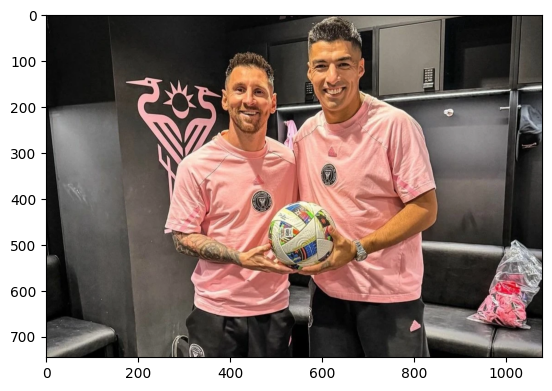

In [19]:
img = cv2.imread('image/face.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
def predictEmotion(roi):
  roi = np.array(roi)
  roi = cv2.resize(roi,(48,48))
  roi = np.expand_dims(roi,axis = 0) #makes image shape (1,48,48)
  roi = roi.reshape(1,48,48,1)
  roi = roi/255.0
  result = model.predict(roi)
  result = list(result[0])
  return label_dict[result.index(max(result))]

In [10]:
def calculate_font_scale(img, base_scale=3.0):
    height, width = img.shape[:2]
    # Tính toán font scale dựa trên chiều cao của hình ảnh
    font_scale = (height / 1000.0) * base_scale
    return font_scale

In [11]:
if not cap.isOpened():
    print('Error')

while cap.isOpened():
    ret,frame = cap.read()
    faceCas = cv2.CascadeClassifier(haar)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face = faceCas.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in face:
        #get region of interest
        roi = gray[y:y+h,x:x+w]
        # draw rectangle around face 
        cv2.rectangle(frame, (x,y), (x + w , y + h), (0,255,0), 2)
        # predict roi 
        pred = predictEmotion(roi)
        # draw predict on image 
        cv2.putText(frame, pred, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 5)
    if ret:
        cv2.imshow('Face', frame)
    if cv2.waitKey(25) == 27:
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


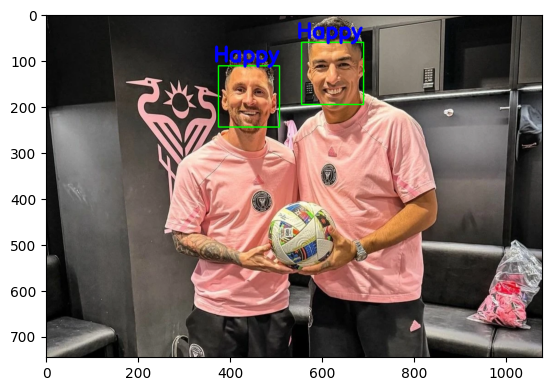

In [20]:
face = faceCas.detectMultiScale(gray, 1.3, 3)
# font_scale = calculate_font_scale(img)
# type(face)
for (x,y,w,h) in face:
  roi = gray[y:y+h,x:x+w]
  pred = predictEmotion(roi)
  cv2.rectangle(img, (x,y), (x + w , y + h), (0,255,0), 2)
  cv2.putText(img, pred, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 5)
plt.imshow(img)